In [1]:
from mpi4py import MPI
import numpy as np
import h5py
import dxchange
import torch as tc
import os
import torch as tc
import torch.nn.functional as F
from tqdm import tqdm
import csv

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib 
matplotlib.rcParams['pdf.fonttype'] = 'truetype'

fontProperties = {'family': 'sans-serif', 'sans-serif': ['Helvetica'], 'weight': 'normal', 'size': 12}
plt.rc('font', **fontProperties)

import matplotlib as mpl
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick

In [2]:
def rotate(arr, theta, dev):
 
    m0 = tc.tensor([tc.cos(theta), -tc.sin(theta), 0.0], device=dev)
    m1 = tc.tensor([tc.sin(theta), tc.cos(theta), 0.0], device=dev)
    m = tc.stack([m0, m1]).view(1, 2, 3)
    m = m.repeat([arr.shape[0], 1, 1])
    
    g = F.affine_grid(m, arr.shape)
    q = F.grid_sample(arr, g, padding_mode='border')
    
    return q


In [3]:
## For a 64 x 64 x 64 sample_8_size_64_test  ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
# theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(64).to(dev)
sample_height_n = tc.tensor(64).to(dev)
sample_size_cm = tc.tensor(0.01).to(dev)
this_aN_dic = {"Ca": 20, "Sc": 21}
probe_energy = np.array([20.0])
det_size_cm = 0.9
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.4

# path of true grid concentration of the sample #
grid_path = './data/sample8_size_64_pad/nElements_2'
f_grid = 'grid_concentration.npy'

# XRF and XRT data path #


# path of storing the intersecting information and the reconstructing results #
recon_path = './data/sample_8_size_64_test_recon'
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [4]:
## For a 44 x 44 x 20 sample: Xtal1, downsampling x4  ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
# theta_ls = - tc.linspace(theta_st, theta_end, n_theta+1)[:-1].to(dev)
sample_size_n = tc.tensor(44).to(dev)
sample_height_n = tc.tensor(20).to(dev)
sample_size_cm = tc.tensor(0.007).to(dev)
this_aN_dic = {"Al": 13, "Si": 14, "Fe": 26, "Cu": 29}, 
probe_energy = np.array([10.0])
det_size_cm = 2.4
det_from_sample_cm = 3.0
det_ds_spacing_cm = 2.4/6.0

# path of true grid concentration of the sample #


# XRF and XRT data path #


# path of storing the intersecting information and the reconstructing results #
recon_path = './data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_20.0_b2_25000_lr_1.0E-4_ini_3_full_solid_angle'
# recon_path = './data/Xtal1_align1_adjusted1_ds4_recon/b_1E-4'
f_recon_parameters = 'recon_parameters.txt'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
######################################################################

In [5]:
print(np.mean(recon))

NameError: name 'recon' is not defined

## Plot the reconstructed result - layer sectioning

[ 0  5 10 15]
11.53071


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


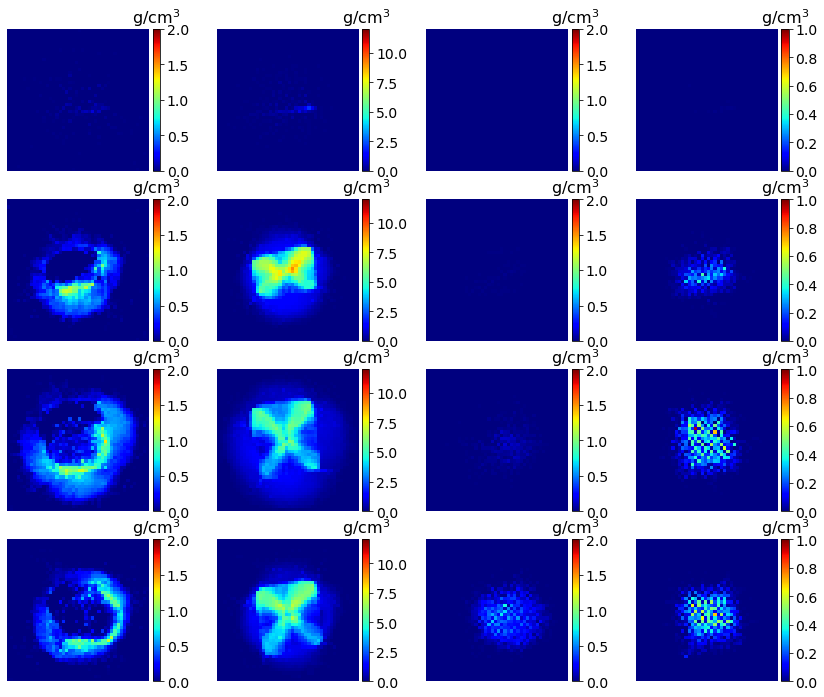

In [6]:
layer_idx_ls = np.arange(0, 20, 5)
# layer_idx_ls = np.array([2, 4, 6, 10, 17, 19])
print(layer_idx_ls)
recon = np.load(os.path.join(recon_path, f_recon_grid + '.npy'))

image_size = recon.shape[-1]
fig6 = plt.figure(figsize=(4 * recon.shape[0] * 0.9 , 3 * len(layer_idx_ls)))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = recon.shape[0], width_ratios=[1] * recon.shape[0])

# fig6.text(0.160+0.035, 0.882, 'Al', color='black', fontsize=24)
# fig6.text(0.36+0.035, 0.882, 'Si', color='black', fontsize=24)
# fig6.text(0.56+0.035, 0.882, 'Fe', color='black', fontsize=24)
# fig6.text(0.76+0.035, 0.882, 'Cu', color='black', fontsize=24)

vmax_element_ls = [0.5,2,5,5]
# vmax_element_ls = [10]
# fig6.text(0.27, 0.885, 'Ca', color='black', fontsize=24)
# fig6.text(0.70, 0.885, 'Sc', color='black', fontsize=24)
print(np.max(recon))
for element_idx in range(recon.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
#         pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=200, extent=[0., image_size, image_size, 0.], origin='upper')
#         pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=vmax_element_ls[element_idx], extent=[0., image_size, image_size, 0.], origin='upper')
        pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=np.ceil(np.max(recon[element_idx])), extent=[0., image_size, image_size, 0.], origin='upper')
#         pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=40., extent=[0., image_size, image_size, 0.], origin='upper')
#         pos = fig6_ax1.imshow(recon[element_idx,layer_idx], cmap='jet', vmin=0, vmax=0.5, extent=[0., image_size, image_size, 0.], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05) 
#         ticks = np.arange(0, np.ceil(np.max(recon[element_idx]))+2, 1)
#         cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar = fig6.colorbar(pos, cax=cax)
#         cbar.ax.set_yticklabels(["{:.1f}".format(i) for i in ticks])
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('g/'+r'$\rm{cm}^{3}$', size='16')
        
plt.savefig(os.path.join(recon_path, 'recon_layer_section.pdf'))

## Plot the reconstructed result - projection view

/home/hpphappy/anaconda3/envs/joint_XRF_XRT/lib/python3.7/site-packages/torch/nn/functional.py:3447: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/home/hpphappy/anaconda3/envs/joint_XRF_XRT/lib/python3.7/site-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


(4, 20, 44, 44)


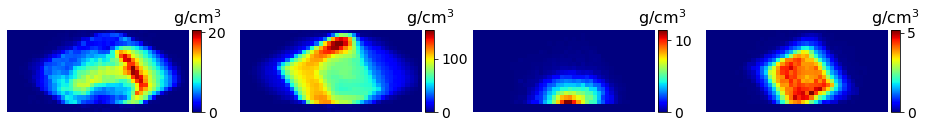

In [7]:
rotational_degree = 0
projection_angle = rotational_degree*tc.tensor(np.pi/180)


recon = np.load(os.path.join(recon_path, f_recon_grid + '.npy'))
recon = rotate(tc.from_numpy(recon), projection_angle, "cpu")
recon = recon.numpy()
print(recon.shape)

smaple_height = recon.shape[1]
image_size = recon.shape[-1]

recon_proj = np.sum(recon, axis=-1)

fig6 = plt.figure(figsize=(4 * recon.shape[0]  , 3))
gs6 = gridspec.GridSpec(nrows= 1, ncols = recon.shape[0], width_ratios=[1] * recon.shape[0])

# fig6.text(0.160+0.035, 0.7, 'Al', color='black', fontsize=24)
# fig6.text(0.360+0.035, 0.7, 'Si', color='black', fontsize=24)
# fig6.text(0.560+0.035, 0.7, 'Fe', color='black', fontsize=24)
# fig6.text(0.760+0.035, 0.7, 'Cu', color='black', fontsize=24)

# fig6.text(0.27, 0.9, 'Ca', color='black', fontsize=24)
# fig6.text(0.70, 0.9, 'Sc', color='black', fontsize=24)

for element_idx in range(recon.shape[0]):
    fig6_ax1 = fig6.add_subplot(gs6[0, element_idx])
    fig6_ax1.set_xticks(np.arange(0, image_size, 1))
    fig6_ax1.set_yticks(np.arange(0, image_size, 1))
    # fig6_ax1.grid(color='w', linewidth=2)
    fig6_ax1.axis('off')
    pos = fig6_ax1.imshow(recon_proj[element_idx], cmap='jet', vmin=0, vmax=np.max(recon_proj[element_idx]), extent=[0, image_size, smaple_height, 0], origin='upper')
#     pos = fig6_ax1.imshow(recon_proj[element_idx], cmap='jet', vmin=0, vmax=1, extent=[0, image_size, smaple_height, 0], origin='upper')
    divider = make_axes_locatable(fig6_ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
#         ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
#         cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
    cbar = fig6.colorbar(pos, cax=cax)
    cbar.ax.tick_params(labelsize=14) 
    cbar.ax.set_title('g/'+r'$\rm{cm}^{3}$', size='16')

plt.savefig(os.path.join(recon_path, f'recon_projection_{rotational_degree}_degree.pdf'))

# Plot the sinogram from the raw data

In [538]:
## For a 64 x 64 x 64 sample: sample8 ##
######################################################################
# XRF and XRT data path #
data_path = './data/Xtal1_align1_adjusted3_ds4'
f_XRF_data = 'xtal1_xrf-roi-plus'
f_XRT_data = 'xtal1_scalers'

y1_true_handle = h5py.File(os.path.join(data_path, f_XRF_data), 'r')
y2_true_handle = h5py.File(os.path.join(data_path, f_XRT_data), 'r') 

element_lines_roi_idx = np.array([0, 1, 11, 14])
photon_counts_us_ic_dataset_idx = 1
photon_counts_ds_ic_dataset_idx = 2
photon_counts_abs_ic_dataset_idx = 3
# path of storing the intersecting information and the reconstructing results #
recon_path_selfAb = 'data/Xtal1_align1_adjusted3_ds4_recon/roi_plus'
f_recon_grid = 'grid_concentration'
f_initial_guess = 'initialized_grid_concentration'
dev = 'cpu'
# experiemtal parameters #
theta_ls = tc.from_numpy(y1_true_handle['exchange/theta'][...] * np.pi / 180).float().to(dev)
n_theta = len(theta_ls)
sample_size_n = 44
sample_height_n = 20
sample_size_cm = 0.007
this_aN_dic = {"Al": 13, "Si": 14, "Fe": 26, "Cu": 29}
n_elements = 4
probe_energy = np.array([10.0])
det_size_cm = 2.4
det_from_sample_cm = 3.0
det_ds_spacing_cm = 2.4/2
######################################################################


XRF_data = np.reshape(y1_true_handle['exchange/data'][element_lines_roi_idx], (len(element_lines_roi_idx), n_theta, sample_height_n * sample_size_n))
XRT_data = np.reshape(y2_true_handle['exchange/data'][photon_counts_abs_ic_dataset_idx], (n_theta, sample_height_n * sample_size_n))

y1_true_handle.close()
y2_true_handle.close()

(4, 110, 880)
555.8429


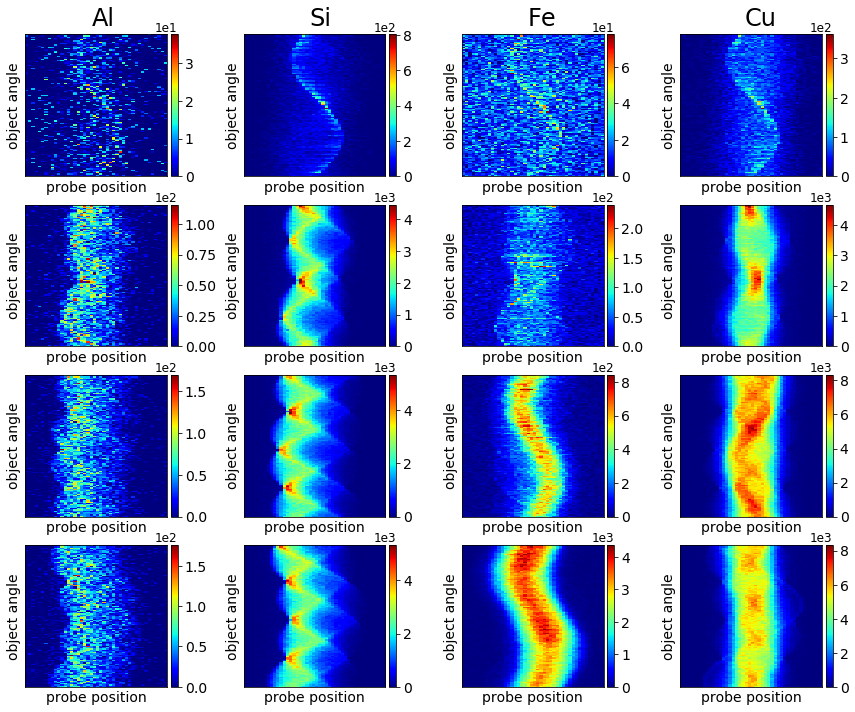

In [259]:
layer_idx_ls = np.arange(0, 20, 5)
n_elements = len(this_aN_dic)
line_idx_all_elements_ls = [[0], [1], [2], [3]]
n_theta =  110
n_theta_ds_factor = 1

print(XRF_data.shape) # (n_theta, n_lines, n_probe_pos)
print(np.mean(XRF_data))

fig6 = plt.figure(figsize=(15, 12))
gs6 = gridspec.GridSpec(nrows=len(layer_idx_ls), ncols=n_elements)
# fig6.text(0.270, 0.89, 'Ca', color='black', fontsize=24)
# fig6.text(0.700, 0.89, 'Sc', color='black', fontsize=24)

fig6.text(0.165+0.035, 0.89, 'Al', color='black', fontsize=24)
fig6.text(0.367+0.035, 0.89, 'Si', color='black', fontsize=24)
fig6.text(0.569+0.035, 0.89, 'Fe', color='black', fontsize=24)
fig6.text(0.770+0.035, 0.89, 'Cu', color='black', fontsize=24)

for i_element in range(n_elements):
    max_XRF_data_this_line = 0.
    for idx, layer_idx in enumerate(layer_idx_ls):
        probe_pos_st = sample_size_n * layer_idx
        probe_pos_end = sample_size_n * (layer_idx + 1)
        XRF_data_ds = np.zeros(XRF_data[0, ::n_theta_ds_factor, probe_pos_st:probe_pos_end].shape)
        line_idx_ls = line_idx_all_elements_ls[i_element]
        for line_idx in line_idx_ls:
            XRF_data_ds += XRF_data[line_idx, ::n_theta_ds_factor, probe_pos_st:probe_pos_end]
#         XRF_data_ds = np.transpose(XRF_data_ds, (1,0))
        max_XRF_data_this_line = np.max(np.array([max_XRF_data_this_line, np.max(XRF_data_ds)]))
        fig6_ax1 = fig6.add_subplot(gs6[idx, i_element])
        pos = fig6_ax1.imshow(XRF_data_ds, cmap='jet', vmin=0, vmax=max_XRF_data_this_line, extent=[0, XRF_data_ds.shape[1], probe_pos_end-probe_pos_st, 0], origin='lower')
#         pos = fig6_ax1.imshow(XRF_data_ds, cmap='jet', vmin=0, vmax=800, extent=[0, XRF_data_ds.shape[1], probe_pos_end-probe_pos_st, 0], origin='lower')
        plt.setp(fig6_ax1.get_xticklabels(), visible=False)
        plt.setp(fig6_ax1.get_yticklabels(), visible=False)
        fig6_ax1.tick_params(axis='both', which='both', length=0)
#         fig6_ax1.axis('off')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
#         ticks = np.arange(0, 12000, 2000)
#         cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar = fig6.colorbar(pos, cax=cax) 
        cbar.ax.tick_params(labelsize=14) 
        cbar.formatter.set_powerlimits((0, 0))
        fig6_ax1.set_ylabel("object angle", fontsize=14)
        fig6_ax1.set_xlabel("probe position", fontsize=14)
    # cbar.ax.set_title('XRF signal', size='14')
plt.savefig('XRF_sinogram.pdf', format='pdf', dpi=600)

(4, 110, 880)
555.8429
312.0791
1882.7549
2883.2761
3352.895


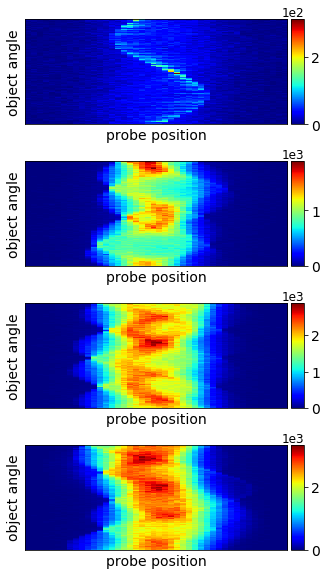

In [260]:
layer_idx_ls = np.arange(0, 20, 5)
n_elements = len(this_aN_dic)
line_idx_all_elements_ls = [[0], [1], [2], [3]]
n_theta =  110
n_theta_ds_factor = 1

print(XRF_data.shape) # (n_theta, n_lines, n_probe_pos)
print(np.mean(XRF_data))

fig6 = plt.figure(figsize=(5, 10))
gs6 = gridspec.GridSpec(nrows=len(layer_idx_ls), ncols=1)
# fig6.text(0.270, 0.89, 'Ca', color='black', fontsize=24)
# fig6.text(0.700, 0.89, 'Sc', color='black', fontsize=24)

# fig6.text(0.165+0.035, 0.89, 'Al', color='black', fontsize=24)
# fig6.text(0.367+0.035, 0.89, 'Si', color='black', fontsize=24)
# fig6.text(0.569+0.035, 0.89, 'Fe', color='black', fontsize=24)
# fig6.text(0.770+0.035, 0.89, 'Cu', color='black', fontsize=24)


for idx, layer_idx in enumerate(layer_idx_ls):
    probe_pos_st = sample_size_n * layer_idx
    probe_pos_end = sample_size_n * (layer_idx + 1)
    XRF_data_ds = np.zeros(XRF_data[:, ::n_theta_ds_factor, probe_pos_st:probe_pos_end].shape)

    XRF_data_ds = XRF_data[:, ::n_theta_ds_factor, probe_pos_st:probe_pos_end]
    XRF_data_ds_mean = np.mean(XRF_data_ds, axis=0)

#         XRF_data_ds = np.transpose(XRF_data_ds, (1,0))
    fig6_ax1 = fig6.add_subplot(gs6[idx, 0])
    pos = fig6_ax1.imshow(XRF_data_ds_mean, cmap='jet', vmin=0, vmax=np.max(XRF_data_ds_mean), extent=[0, XRF_data_ds.shape[1], probe_pos_end-probe_pos_st, 0], origin='lower')
#         pos = fig6_ax1.imshow(XRF_data_ds, cmap='jet', vmin=0, vmax=10000, extent=[0, XRF_data_ds.shape[1], probe_pos_end-probe_pos_st, 0], origin='lower')
    print(np.max(XRF_data_ds_mean))
    plt.setp(fig6_ax1.get_xticklabels(), visible=False)
    plt.setp(fig6_ax1.get_yticklabels(), visible=False)
    fig6_ax1.tick_params(axis='both', which='both', length=0)
#         fig6_ax1.axis('off')
    divider = make_axes_locatable(fig6_ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
#         ticks = np.arange(0, 12000, 2000)
#         cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
    cbar = fig6.colorbar(pos, cax=cax) 
    cbar.ax.tick_params(labelsize=14) 
    cbar.formatter.set_powerlimits((0, 0))
    fig6_ax1.set_ylabel("object angle", fontsize=14)
    fig6_ax1.set_xlabel("probe position", fontsize=14)
# cbar.ax.set_title('XRF signal', size='14')
plt.savefig('XRF_sinogram.pdf', format='pdf', dpi=600)

1.0
0.7764637


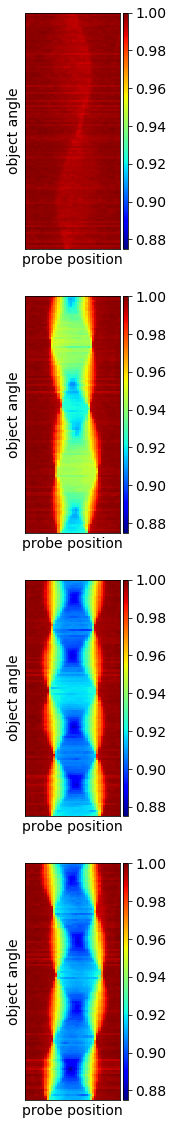

In [261]:
layer_idx_ls = np.arange(0, 20, 5)
XRT_data = np.reshape(XRT_data, (n_theta, sample_height_n * sample_size_n))
n_elements = len(this_aN_dic)
n_theta_cpu =  n_theta
n_theta_ds_factor = 1
print(np.max(XRT_data))
print(np.min(XRT_data))

# fig6 = plt.figure(figsize=(20, 30))
fig6 = plt.figure(figsize=(8, 20))
gs6 = gridspec.GridSpec(nrows=len(layer_idx_ls), ncols=1)

for idx, layer_idx in enumerate(layer_idx_ls):
    probe_pos_st = sample_size_n * layer_idx
    probe_pos_end = sample_size_n * (layer_idx + 1)
    XRT_data_ds = XRT_data[::n_theta_ds_factor, probe_pos_st:probe_pos_end]
#     XRT_data_ds = np.transpose(XRT_data[::n_theta_ds_factor, probe_pos_st:probe_pos_end], (1,0))
#     print(np.max(XRT_data_ds))
    fig6_ax1 = fig6.add_subplot(gs6[idx])
#     pos = fig6_ax1.imshow(XRT_data_ds, cmap='jet', vmin=180000, vmax= np.max(XRT_data), extent=[0, 110, 44, 0], origin='upper')
    pos = fig6_ax1.imshow(XRT_data_ds, cmap='jet', vmin=0.875, vmax= 1.0, origin='upper')
#     pos = fig6_ax1.imshow(XRT_data_ds, cmap='jet', vmin=0.80, vmax= 0.95, origin='upper')
    plt.setp(fig6_ax1.get_xticklabels(), visible=False)
    plt.setp(fig6_ax1.get_yticklabels(), visible=False)
    fig6_ax1.tick_params(axis='both', which='both', length=0)
#         fig6_ax1.axis('off')
    divider = make_axes_locatable(fig6_ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
#     ticks = np.array([180000, 200000])
#     cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
    cbar = fig6.colorbar(pos, cax=cax)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.ax.tick_params(labelsize=14) 
    fig6_ax1.set_xlabel("probe position", fontsize=14)
    fig6_ax1.set_ylabel("object angle", fontsize=14)
# cbar.ax.set_title('XRF signal', size='14')
plt.savefig('XRT_sinogram.pdf', format='pdf', dpi=600)

0.2530054
0.01012613
0.09567213
0.123712696
0.12897871


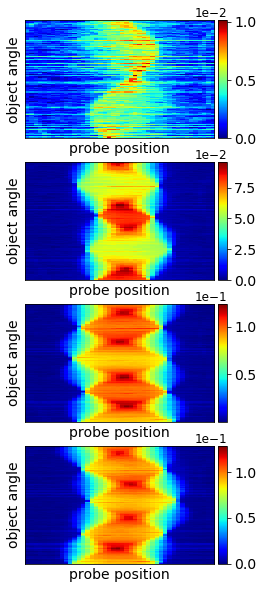

In [158]:
layer_idx_ls = np.arange(0, 20, 5)
XRT_data = np.reshape(XRT_data, (n_theta, sample_height_n * sample_size_n))
XRT_data = - np.log(XRT_data)
n_elements = len(this_aN_dic)
n_theta_cpu =  n_theta
n_theta_ds_factor = 1
print(np.max(XRT_data))

# fig6 = plt.figure(figsize=(20, 30))
fig6 = plt.figure(figsize=(10,10))
gs6 = gridspec.GridSpec(nrows=len(layer_idx_ls), ncols=1)

for idx, layer_idx in enumerate(layer_idx_ls):
    probe_pos_st = sample_size_n * layer_idx
    probe_pos_end = sample_size_n * (layer_idx + 1)
    XRT_data_ds = XRT_data[::n_theta_ds_factor, probe_pos_st:probe_pos_end]
#     XRT_data_ds = np.transpose(XRT_data[::n_theta_ds_factor, probe_pos_st:probe_pos_end], (1,0))
#     print(np.max(XRT_data_ds))
    fig6_ax1 = fig6.add_subplot(gs6[idx])
    pos = fig6_ax1.imshow(XRT_data_ds, cmap='jet', extent=[0, 176, 110, 0], origin='upper')
#     pos = fig6_ax1.imshow(XRT_data_ds, cmap='jet', extent=[0, XRT_data_ds.shape[0], probe_pos_end-probe_pos_st, 0], origin='upper')
    print(np.max(XRT_data_ds))
#     pos = fig6_ax1.imshow(XRT_data_ds, cmap='jet', vmin=0.80, vmax= 0.95, origin='upper')
    plt.setp(fig6_ax1.get_xticklabels(), visible=False)
    plt.setp(fig6_ax1.get_yticklabels(), visible=False)
    fig6_ax1.tick_params(axis='both', which='both', length=0)
#         fig6_ax1.axis('off')
    divider = make_axes_locatable(fig6_ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
#     ticks = np.array([180000, 200000])
#     cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
    cbar = fig6.colorbar(pos, cax=cax)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.ax.tick_params(labelsize=14) 
    fig6_ax1.set_xlabel("probe position", fontsize=14)
    fig6_ax1.set_ylabel("object angle", fontsize=14)
# cbar.ax.set_title('XRF signal', size='14')
plt.savefig('XRT_sinogram.pdf', format='pdf', dpi=600)

(4, 110, 880)


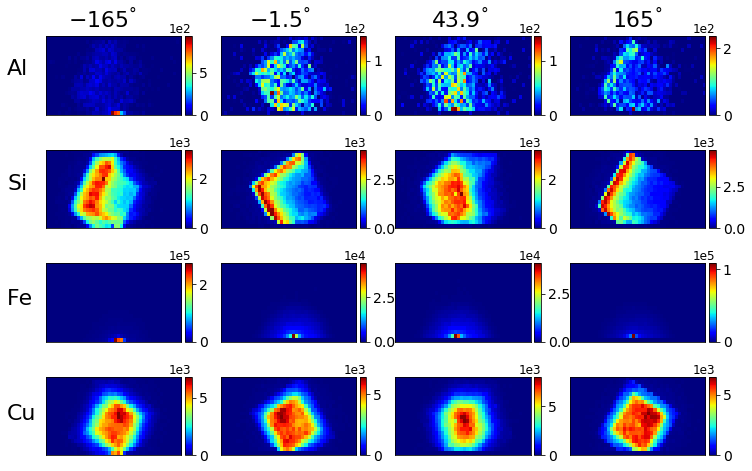

In [159]:
theta_idx_ls = np.array([0, 54, 69, 109])
XRF_data_projection =  np.reshape(XRF_data, (len(element_lines_roi_idx), n_theta, sample_height_n, sample_size_n))
print(XRF_data.shape)

fig6 = plt.figure(figsize=(12, 8))
gs6 = gridspec.GridSpec(len(element_lines_roi_idx), ncols=len(theta_idx_ls))

fig6.text(0.08, 0.8, 'Al', color='black', fontsize=22)
fig6.text(0.08, 0.6, 'Si', color='black', fontsize=22)
fig6.text(0.08, 0.4, 'Fe', color='black', fontsize=22)
fig6.text(0.08, 0.2, 'Cu', color='black', fontsize=22)

fig6.text(0.15, 0.88, r'$-165^\degree$', color='black', fontsize=22)
fig6.text(0.36, 0.88, r'$-1.5^\degree$', color='black', fontsize=22)
fig6.text(0.57, 0.88, r'$43.9^\degree$', color='black', fontsize=22)
fig6.text(0.78, 0.88, r'$165^\degree$', color='black', fontsize=22)

for idx, theta_idx in enumerate(theta_idx_ls):
    for line_idx in range(len(element_lines_roi_idx)):              
        fig6_ax1 = fig6.add_subplot(gs6[line_idx, idx])                                        
        pos = fig6_ax1.imshow(XRF_data_projection[line_idx, theta_idx], cmap='jet', vmin=0, vmax = np.max(XRF_data_projection[line_idx, theta_idx]), extent=[0, n_theta, 64, 0], origin='upper')
#         pos = fig6_ax1.imshow(XRF_data_projection[line_idx, theta_idx], cmap='jet', vmin=0, vmax=1000, extent=[0, n_theta, 64, 0], origin='upper')
        plt.setp(fig6_ax1.get_xticklabels(), visible=False)
        plt.setp(fig6_ax1.get_yticklabels(), visible=False)
        fig6_ax1.tick_params(axis='both', which='both', length=0)                        
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)                        
        cbar = fig6.colorbar(pos, cax=cax) 
        cbar.ax.tick_params(labelsize=14) 
        cbar.formatter.set_powerlimits((0, 0))                        
                        

# Plot the initial guess

./data/Xtal1_align1_adjusted2_ds4_recon/Ab_F_nEl_4_nDpts_4_b_0.0_lr_2.5E-4_ini_1/initialized_grid_concentration.npy


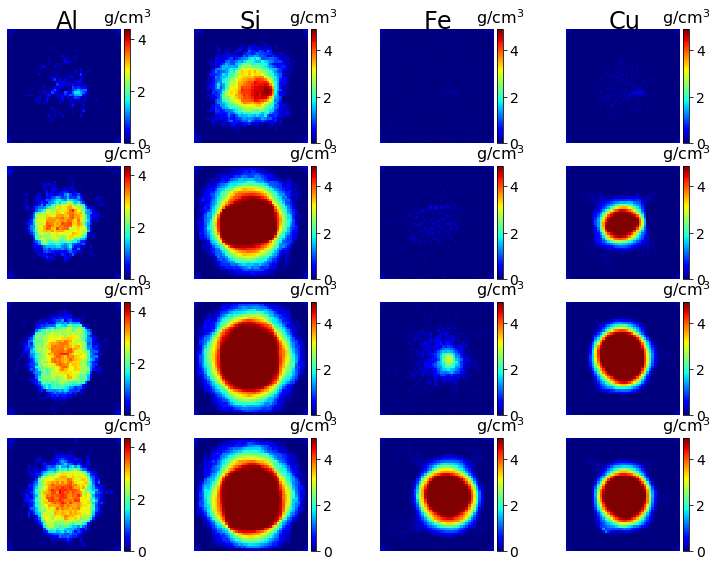

In [32]:
recon_ini = np.load(os.path.join(recon_path, f_initial_guess)+'.npy')
print(os.path.join(recon_path, f_initial_guess)+'.npy')
image_size = recon_ini.shape[-1]
fig6 = plt.figure(figsize=(4 * recon_ini.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = recon_ini.shape[0], width_ratios=[1] * recon_ini.shape[0])

fig6.text(0.160+0.035, 0.882, 'Al', color='black', fontsize=24)
fig6.text(0.36+0.035, 0.882, 'Si', color='black', fontsize=24)
fig6.text(0.56+0.035, 0.882, 'Fe', color='black', fontsize=24)
fig6.text(0.76+0.035, 0.882, 'Cu', color='black', fontsize=24)

for element_idx in range(recon_ini.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(recon_ini[element_idx,layer_idx], cmap='jet', vmin=0, vmax=np.max(recon_ini[element_idx]), extent=[0, 5, 5, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
#         ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
#         cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar = fig6.colorbar(pos, cax=cax)
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('g/'+r'$\rm{cm}^{3}$', size='16')

(4, 20, 44, 44)


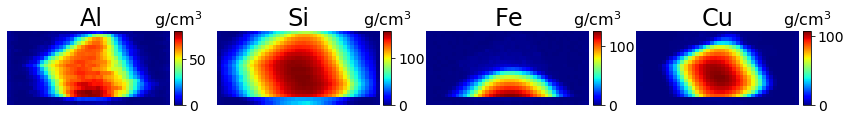

In [34]:
rotational_degree = 0
projection_angle = rotational_degree*tc.tensor(np.pi/180)

recon_ini = np.load(os.path.join(recon_path, f_initial_guess)+'.npy')
recon_ini = rotate(tc.from_numpy(recon_ini), projection_angle, "cpu")
recon_ini = recon_ini.numpy()
print(recon.shape)

smaple_height = recon.shape[1]
image_size = recon.shape[-1]

recon_ini_proj = np.sum(recon_ini, axis=-1)
fig6 = plt.figure(figsize=(4 * recon_ini.shape[0] * 0.9 , 3))
gs6 = gridspec.GridSpec(nrows= 1, ncols = recon_ini.shape[0], width_ratios=[1] * recon_ini.shape[0])

fig6.text(0.160+0.035, 0.7, 'Al', color='black', fontsize=24)
fig6.text(0.360+0.035, 0.7, 'Si', color='black', fontsize=24)
fig6.text(0.560+0.035, 0.7, 'Fe', color='black', fontsize=24)
fig6.text(0.760+0.035, 0.7, 'Cu', color='black', fontsize=24)

# fig6.text(0.27, 0.9, 'Ca', color='black', fontsize=24)
# fig6.text(0.70, 0.9, 'Sc', color='black', fontsize=24)

for element_idx in range(recon_ini.shape[0]):
    fig6_ax1 = fig6.add_subplot(gs6[0, element_idx])
    fig6_ax1.set_xticks(np.arange(0, image_size, 1))
    fig6_ax1.set_yticks(np.arange(0, image_size, 1))
    # fig6_ax1.grid(color='w', linewidth=2)
    fig6_ax1.axis('off')
    pos = fig6_ax1.imshow(recon_ini_proj[element_idx], cmap='jet', vmin=0, vmax=np.max(recon_ini_proj[element_idx]), extent=[0, image_size, smaple_height, 0], origin='upper')
    divider = make_axes_locatable(fig6_ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
#         ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
#         cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
    cbar = fig6.colorbar(pos, cax=cax)
    cbar.ax.tick_params(labelsize=14) 
    cbar.ax.set_title('g/'+r'$\rm{cm}^{3}$', size='16')

# Plot the reprojected sinogram

In [632]:
## For a 44 x 44 x 20 sample: sample8 ##
######################################################################
dev = 'cpu'
# experiemtal parameters #
n_theta =  tc.tensor(110).to(dev)
sample_size_n = 44
sample_height_n = 20
sample_size_cm = 0.007
this_aN_dic = {"Al": 13, "Si": 14, "Fe": 26, "Cu": 29}
# this_aN_dic = {"Al": 13}
probe_energy = np.array([10.0])
det_size_cm = 0.9
det_from_sample_cm = 1.6
det_ds_spacing_cm = 0.4


# XRF and XRT data path #
data_path = './data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_100_b2_25000_lr_1.0E-3_ini_3_full_solid_angle'
f_XRF_data = 'reprojected_XRF_data'
f_XRT_data = 'reprojected_XRT_data'

######################################################################

## reprojected XRF  sinogram

(110, 4, 880)


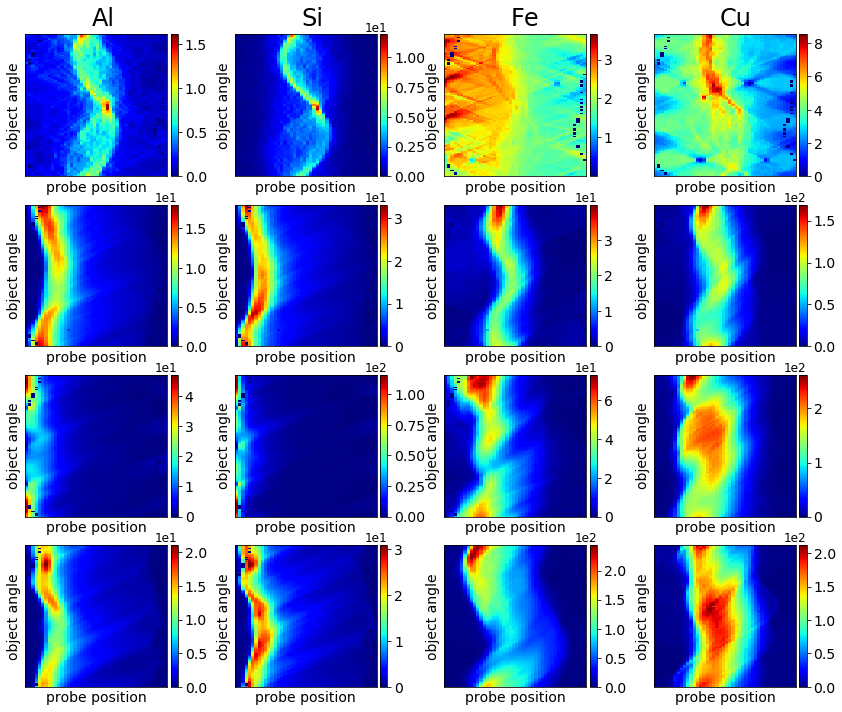

In [633]:
n_elements = len(this_aN_dic)
line_idx_all_elements_ls = [[0],[1],[2],[3]]
# line_idx_all_elements_ls = [[0]]
n_theta_cpu =  n_theta.to("cpu")
n_theta_ds_factor = 1
layer_idx_ls = np.arange(0, 20, 5)
# layer_idx_ls = np.array([30, 40])

XRF_data = np.load(os.path.join(data_path, f_XRF_data) + '.npy').astype(np.float32)
print(XRF_data.shape) # (n_theta, n_lines, n_probe_pos)

vmax_element_ls = [15,100,2000,2000]

fig6 = plt.figure(figsize=(4 * XRF_data.shape[1] * 0.9 , 3 * len(layer_idx_ls)))
gs6 = gridspec.GridSpec(nrows=len(layer_idx_ls), ncols=n_elements)

fig6.text(0.165+0.035, 0.89, 'Al', color='black', fontsize=24)
fig6.text(0.367+0.035, 0.89, 'Si', color='black', fontsize=24)
fig6.text(0.569+0.035, 0.89, 'Fe', color='black', fontsize=24)
fig6.text(0.770+0.035, 0.89, 'Cu', color='black', fontsize=24)
# fig6.text(0.270, 0.89, 'Ca', color='black', fontsize=24)
# fig6.text(0.700, 0.89, 'Sc', color='black', fontsize=24)
for i_element in range(n_elements):
    max_XRF_data_this_line = 0.
    for idx, layer_idx in enumerate(layer_idx_ls):
        probe_pos_st = sample_size_n * layer_idx
        probe_pos_end = sample_size_n * (layer_idx + 1)
        XRF_data_ds = np.zeros(XRF_data[::n_theta_ds_factor, 0, probe_pos_st:probe_pos_end].shape)
        line_idx_ls = line_idx_all_elements_ls[i_element]
        for line_idx in line_idx_ls:
            XRF_data_ds += XRF_data[::n_theta_ds_factor, line_idx, probe_pos_st:probe_pos_end]
#         print(np.argwhere(XRF_data_ds == np.max(XRF_data_ds)))
#         XRF_data_ds = np.transpose(XRF_data_ds, (1,0))
        max_XRF_data_this_line = np.max(np.array([max_XRF_data_this_line, np.max(XRF_data_ds)]))
        fig6_ax1 = fig6.add_subplot(gs6[idx, i_element])
#         pos = fig6_ax1.imshow(XRF_data_ds, cmap='jet', vmin=0, vmax=vmax_element_ls[i_element], origin='lower')
        pos = fig6_ax1.imshow(XRF_data_ds, cmap='jet', origin='lower', extent=[0, 100, 100, 0])
        plt.setp(fig6_ax1.get_xticklabels(), visible=False)
        plt.setp(fig6_ax1.get_yticklabels(), visible=False)
        fig6_ax1.tick_params(axis='both', which='both', length=0)
#         fig6_ax1.axis('off')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
#         ticks = np.arange(0, 12000, 2000)
#         cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)   
        cbar = fig6.colorbar(pos, cax=cax)
        cbar.ax.tick_params(labelsize=14) 
        cbar.formatter.set_powerlimits((0, 0))
        fig6_ax1.set_xlabel("probe position", fontsize=14)
        fig6_ax1.set_ylabel("object angle", fontsize=14)
    # cbar.ax.set_title('XRF signal', size='14')
plt.savefig('XRF_sinogram.pdf', format='pdf', dpi=600)

(110, 4, 20, 44)


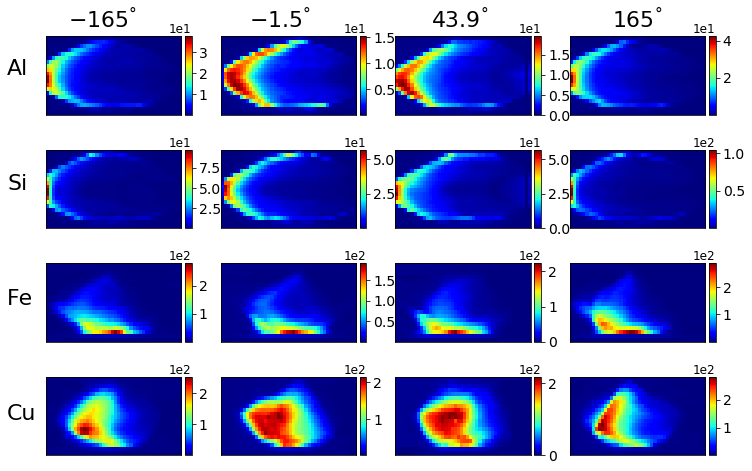

In [634]:
# theta_idx_ls = np.array([0, 54, 69, 109])
theta_idx_ls = np.array([0, 54, 69, 109])
XRF_data_projection =  np.reshape(XRF_data, (n_theta, XRF_data.shape[1], sample_height_n, sample_size_n))
print(XRF_data_projection.shape)

fig6 = plt.figure(figsize=(12, 8))
gs6 = gridspec.GridSpec(XRF_data.shape[1], ncols=len(theta_idx_ls))

fig6.text(0.08, 0.8, 'Al', color='black', fontsize=22)
fig6.text(0.08, 0.6, 'Si', color='black', fontsize=22)
fig6.text(0.08, 0.4, 'Fe', color='black', fontsize=22)
fig6.text(0.08, 0.2, 'Cu', color='black', fontsize=22)

fig6.text(0.15, 0.88, r'$-165^\degree$', color='black', fontsize=22)
fig6.text(0.36, 0.88, r'$-1.5^\degree$', color='black', fontsize=22)
fig6.text(0.57, 0.88, r'$43.9^\degree$', color='black', fontsize=22)
fig6.text(0.78, 0.88, r'$165^\degree$', color='black', fontsize=22)

for idx, theta_idx in enumerate(theta_idx_ls):
    for line_idx in range(XRF_data.shape[1]):              
        fig6_ax1 = fig6.add_subplot(gs6[line_idx, idx])                                        
#         pos = fig6_ax1.imshow(XRF_data_projection[line_idx, theta_idx], cmap='jet', vmin=0, vmax = np.max(XRF_data_projection[line_idx, theta_idx]), extent=[0, n_theta, 64, 0], origin='upper')
        pos = fig6_ax1.imshow(XRF_data_projection[theta_idx, line_idx], cmap='jet', extent=[0, n_theta, 64, 0], origin='upper')
        plt.setp(fig6_ax1.get_xticklabels(), visible=False)
        plt.setp(fig6_ax1.get_yticklabels(), visible=False)
        fig6_ax1.tick_params(axis='both', which='both', length=0)                        
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)                        
        cbar = fig6.colorbar(pos, cax=cax) 
        cbar.ax.tick_params(labelsize=14) 
        cbar.formatter.set_powerlimits((0, 0)) 

## reprojected XRT sinogram

6.063797
0.00043729687


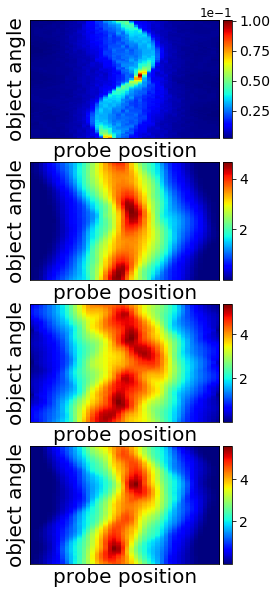

In [635]:
n_elements = len(this_aN_dic)
layer_idx_ls = np.arange(0,20,5)
# layer_idx_ls = np.array([30, 40])
n_theta_cpu =  n_theta.to("cpu")
n_theta_ds_factor = 1

XRT_data = np.load(os.path.join(data_path, f_XRT_data) + '.npy').astype(np.float32)
print(np.max(XRT_data))
print(np.min(XRT_data))
fig6 = plt.figure(figsize=(10, 10))
gs6 = gridspec.GridSpec(nrows=len(layer_idx_ls), ncols=1)

for idx, layer_idx in enumerate(layer_idx_ls):
    probe_pos_st = 44 * layer_idx
    probe_pos_end = 44 * (layer_idx + 1)
    XRT_data_ds = XRT_data[::n_theta_ds_factor, probe_pos_st:probe_pos_end]
#     XRT_data_ds = np.transpose(XRT_data[::n_theta_ds_factor, probe_pos_st:probe_pos_end], (1,0))
    fig6_ax1 = fig6.add_subplot(gs6[idx])
    pos = fig6_ax1.imshow(XRT_data_ds, cmap='jet', extent=[0, 176, 110, 0], origin='upper')

    plt.setp(fig6_ax1.get_xticklabels(), visible=False)
    plt.setp(fig6_ax1.get_yticklabels(), visible=False)
    fig6_ax1.tick_params(axis='both', which='both', length=0)
#         fig6_ax1.axis('off')
    divider = make_axes_locatable(fig6_ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
#     ticks = np.array([0, 100, 200, 300])
#     cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
    cbar = fig6.colorbar(pos, cax=cax)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.ax.tick_params(labelsize=14) 
    fig6_ax1.set_xlabel("probe position", fontsize=20)
    fig6_ax1.set_ylabel("object angle", fontsize=20)
# cbar.ax.set_title('XRF signal', size='14')
plt.savefig('XRT_sinogram.pdf', format='pdf', dpi=600)

# Plot the ground truth if using a simulated dataset

## plot the ground truth - layer sectioning

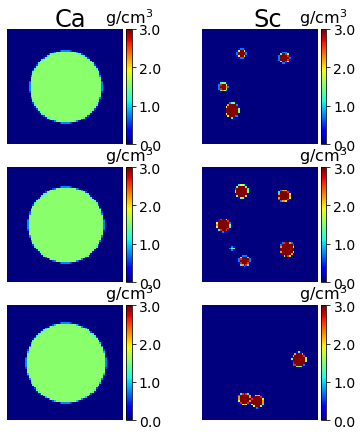

In [30]:
gt = np.load(os.path.join(grid_path, f_grid))

image_size = gt.shape[-1]
fig6 = plt.figure(figsize=(4 * gt.shape[0] * 0.8 , 3 * len(layer_idx_ls) * 0.8))
gs6 = gridspec.GridSpec(nrows= len(layer_idx_ls), ncols = gt.shape[0], width_ratios=[1] * gt.shape[0])

fig6.text(0.27, 0.885, 'Ca', color='black', fontsize=24)
fig6.text(0.70, 0.885, 'Sc', color='black', fontsize=24)

for element_idx in range(gt.shape[0]):
    for idx, layer_idx in enumerate(layer_idx_ls):
        fig6_ax1 = fig6.add_subplot(gs6[idx, element_idx])
        fig6_ax1.set_xticks(np.arange(0, image_size, 1))
        fig6_ax1.set_yticks(np.arange(0, image_size, 1))
        # fig6_ax1.grid(color='w', linewidth=2)
        fig6_ax1.axis('off')
        pos = fig6_ax1.imshow(gt[element_idx,layer_idx], cmap='jet', vmin=0, vmax=3, extent=[0, image_size, image_size, 0], origin='upper')
        divider = make_axes_locatable(fig6_ax1)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        ticks = np.arange(0, 4, 1)
        cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
        cbar.ax.set_yticklabels(["{:.1f}".format(i) for i in ticks])
        cbar.ax.tick_params(labelsize=14) 
        cbar.ax.set_title('g/'+r'$\rm{cm}^{3}$', size='16')

## plot the ground truth - projection view

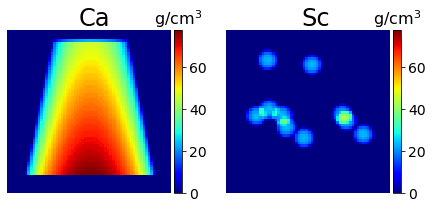

In [23]:
fraction_of_pi = 0.
projection_angle = fraction_of_pi*tc.tensor(np.pi)

gt = np.load(os.path.join(grid_path, f_grid))
gt_rot = rotate(tc.from_numpy(gt).float(), projection_angle, "cpu")
gt_rot = gt_rot.numpy()

smaple_height = gt_rot.shape[1]
image_size = gt_rot.shape[-1]

gt_rot_proj = np.sum(gt_rot, axis=2)
fig6 = plt.figure(figsize=(4 * gt.shape[0] * 0.9 , 3))
gs6 = gridspec.GridSpec(nrows= 1, ncols = gt.shape[0], width_ratios=[1] * gt.shape[0])

fig6.text(0.27, 0.9, 'Ca', color='black', fontsize=24)
fig6.text(0.70, 0.9, 'Sc', color='black', fontsize=24)

for element_idx in range(gt.shape[0]):
    fig6_ax1 = fig6.add_subplot(gs6[0, element_idx])
    fig6_ax1.set_xticks(np.arange(0, image_size, 1))
    fig6_ax1.set_yticks(np.arange(0, image_size, 1))
    # fig6_ax1.grid(color='w', linewidth=2)
    fig6_ax1.axis('off')
    pos = fig6_ax1.imshow(gt_rot_proj[element_idx], cmap='jet', vmin=0, vmax=np.max(gt_rot_proj), extent=[0, image_size, smaple_height, 0], origin='upper')
    divider = make_axes_locatable(fig6_ax1)
    cax = divider.append_axes("right", size="5%", pad=0.05)
#         ticks = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0])
#         cbar = fig6.colorbar(pos, cax=cax, ticks=ticks)
    cbar = fig6.colorbar(pos, cax=cax)
    cbar.ax.tick_params(labelsize=14) 
    cbar.ax.set_title('g/'+r'$\rm{cm}^{3}$', size='16')

plt.savefig(os.path.join(grid_path, f'gt_projection_{fraction_of_pi}.pdf'))

In [11]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

No handles with labels found to put in legend.


[4498873.5 4535097.  4948120.5 4775334.5 4292362.  4623891.  4055944.8
 4933559.5 4317489.5 5376221. ]


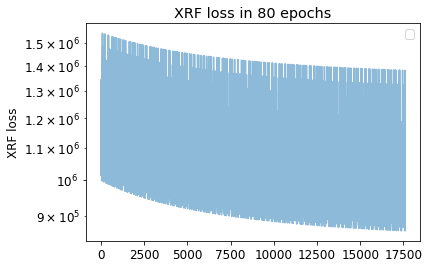

In [36]:
loss = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_F_nEl_1_nDpts_4_b_0.0_lr_1.0E-3_nEpoch_160/Si/XRF_loss_signal.npy")
print(4*loss[:10])
loss_moving_ave = movingaverage(loss, 110)

plt.title("XRF loss in 80 epochs")
plt.plot(loss, alpha = 0.5)
plt.ylabel("XRF loss")
plt.yscale('log')
plt.legend()

No handles with labels found to put in legend.


[4532179.  4524865.  4498650.5 4435253.  5350648.  4429133.  4901078.5
 4291986.5 4489775.5 4073435.5]
4327345.5


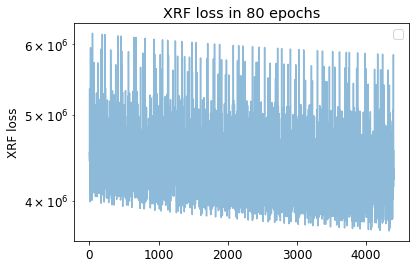

In [34]:
loss = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_F_nEl_1_nDpts_4_b_0.0_lr_1E-3_set_ini_1/Si/XRF_loss_signal.npy")
print(loss[:10])
loss_moving_ave = movingaverage(loss, 110)

plt.title("XRF loss in 80 epochs")
plt.plot(loss, alpha = 0.5)
plt.ylabel("XRF loss")
plt.yscale('log')
plt.legend()


No handles with labels found to put in legend.


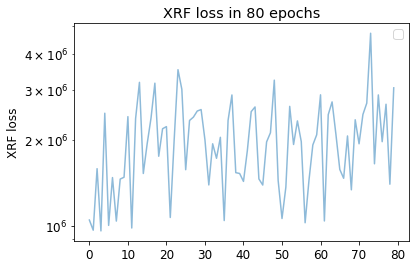

In [31]:
loss = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_1.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRF_loss_signal.npy")
loss_epoch_ave = np.mean(np.reshape(loss, (110, -1)), axis=0)
plt.title("XRF loss in 80 epochs")
plt.plot(loss_epoch_ave, alpha = 0.5)
plt.ylabel("XRF loss")
plt.yscale('log')
plt.legend()

No handles with labels found to put in legend.


(8800,)
2002623.1


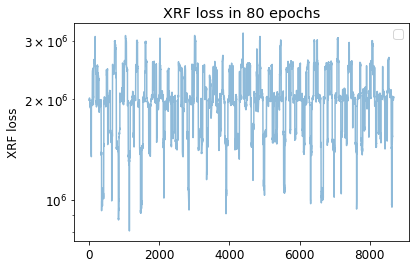

In [23]:
loss = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_1.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRF_loss_signal.npy")
print(loss.shape)
loss_moving_ave = movingaverage(loss, 110)

plt.title("XRF loss in 80 epochs")
plt.plot(loss_moving_ave, alpha = 0.5)
plt.ylabel("XRF loss")
plt.yscale('log')
plt.legend()

print(np.mean(loss[110*35:110*36]))

No handles with labels found to put in legend.


1331163.9


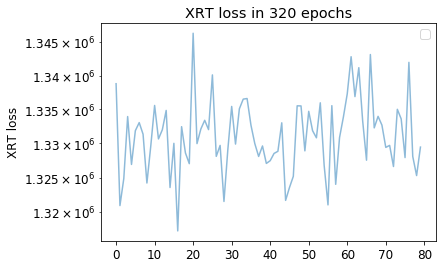

In [32]:
loss = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_1.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRT_loss_signal.npy")
loss_epoch_ave = np.mean(np.reshape(loss, (110, -1)), axis=0)
loss_moving_ave = movingaverage(loss, 110)

plt.title("XRT loss in 320 epochs")
plt.plot(loss_epoch_ave, alpha = 0.5)
plt.ylabel("XRT loss")
plt.yscale('log')
plt.legend()

# print(loss[1895:1895+110])
print(np.mean(loss[110*35:110*36]))

1915549.2


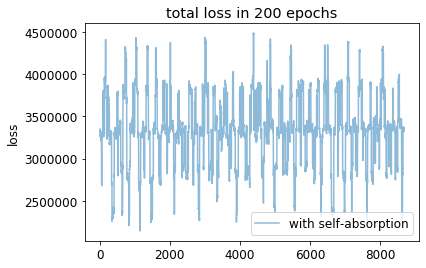

In [26]:
loss = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_1.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/loss_signal.npy")

loss_moving_ave = movingaverage(loss, 110)

plt.title("total loss in 200 epochs")
plt.plot(loss_moving_ave, label = "with self-absorption", alpha = 0.5)
plt.ylabel("loss")
plt.legend()

print(loss[-1])

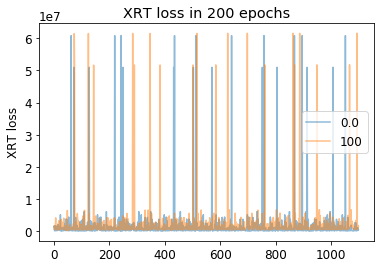

In [230]:
loss_0 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_0.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRF_loss_signal.npy")
loss_1 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_0.1_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRF_loss_signal.npy")
loss_2 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_1.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRF_loss_signal.npy")
loss_3 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_10.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRF_loss_signal.npy")
loss_4 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_20.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRF_loss_signal.npy")
loss_5 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_100_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRF_loss_signal.npy")

plt.title("XRT loss in 200 epochs")
plt.plot(loss_0[-110*10:], label = "0.0", alpha = 0.5)
# plt.plot(loss_1[-110*10:], label = "0.1", alpha = 0.5)
# plt.plot(loss_2[-110*2:], label = "1.0", alpha = 0.5)
# plt.plot(loss_3[-110*2:], label = "10", alpha = 0.5)
# plt.plot(loss_4[-110*2:], label = "20", alpha = 0.5)
plt.plot(loss_5[-110*10:], label = "100", alpha = 0.5)
# plt.plot(loss_4[150000:], label = "1.0 (wo self-Ab)", alpha = 0.5)
plt.ylabel("XRT loss")
plt.legend()

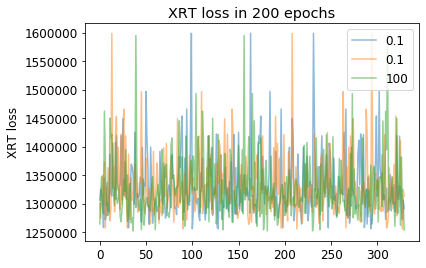

In [228]:
loss_0 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_0.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRT_loss_signal.npy")
loss_1 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_0.1_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRT_loss_signal.npy")
loss_2 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_1.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRT_loss_signal.npy")
loss_3 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_10.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRT_loss_signal.npy")
loss_4 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_20.0_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRT_loss_signal.npy")
loss_5 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_100_b2_25000_lr_1.0E-3_ini_3_full_solid_angle/XRT_loss_signal.npy")

loss_0_moving_ave = movingaverage(loss_0, 110)
loss_1_moving_ave = movingaverage(loss_1, 110)
loss_2_moving_ave = movingaverage(loss_2, 110)
loss_3_moving_ave = movingaverage(loss_3, 110)
loss_4_moving_ave = movingaverage(loss_4, 110)
loss_5_moving_ave = movingaverage(loss_4, 110)

plt.title("XRT loss in 200 epochs")
plt.plot(loss_0[-110*3:], label = "0.1", alpha = 0.5)
plt.plot(loss_1[-110*3:], label = "0.1", alpha = 0.5)
# plt.plot(loss_2[-110*3:], label = "1.0", alpha = 0.5)
# plt.plot(loss_3[-110*3:], label = "10", alpha = 0.5)
# plt.plot(loss_4[-110*3:], label = "20", alpha = 0.5)
plt.plot(loss_5[-110*3:], label = "100", alpha = 0.5)
# plt.plot(loss_4[150000:], label = "1.0 (wo self-Ab)", alpha = 0.5)
plt.ylabel("XRT loss")
plt.legend()

(17600,)
1312518.4


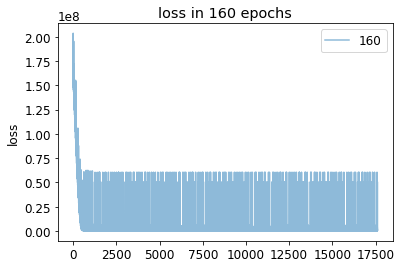

In [39]:
loss_1 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_F_nEl_1_nDpts_4_b_0.0_lr_1.0E-3_full_solid_angle_set_ini_3/Al/loss_signal.npy")
loss_2 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_F_nEl_1_nDpts_4_b_0.0_lr_1.0E-3_full_solid_angle_set_ini_3/Si/loss_signal.npy")
loss_3 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_F_nEl_1_nDpts_4_b_0.0_lr_1.0E-3_full_solid_angle_set_ini_3/Fe/loss_signal.npy")
loss_4 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_F_nEl_1_nDpts_4_b_0.0_lr_1.0E-3_full_solid_angle_set_ini_3/Cu/loss_signal.npy")
print(loss_1.shape)

loss_ave = np.mean(np.array([loss_1, loss_2, loss_3, loss_4]), axis=0)
print(loss_ave[-1])

plt.title("loss in 160 epochs")

plt.plot(loss_ave, label = "160", alpha = 0.5)
plt.ylabel("loss")
plt.legend()

In [561]:
loss = np.load("./data/Xtal1_align1_adjusted1_ds4_recon/Ab_T_nEl_4_nDpts_4_b_1E-5_lr_2.5E-4_ini_1/loss_signal.npy")
loss_2 = np.load("./data/Xtal1_align1_adjusted1_ds4_recon/Ab_F_nEl_4_nDpts_4_b_1E-5_lr_2.5E-4_ini_1/loss_signal.npy")

loss_moving_ave = movingaverage(loss, 110)
loss_2_moving_ave = movingaverage(loss_2, 110)

plt.title("total loss(moving ave) in 200 epochs")
plt.plot(loss, label = "with self-absorption", alpha = 0.5)
plt.plot(loss_2, label = "without self-absorption", alpha = 0.5)
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: './data/Xtal1_align1_adjusted1_ds4_recon/Ab_T_nEl_4_nDpts_4_b_1E-5_lr_2.5E-4_ini_1/loss_signal.npy'

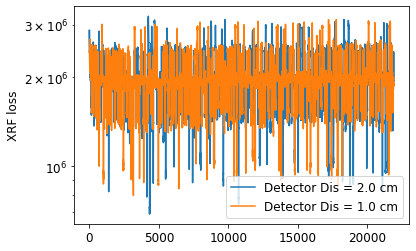

In [235]:
loss = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_0.1_b2_2500_lr_1.0E-3_ini_const_0.0_full_solid_angle/XRF_loss_signal.npy")
loss_2 = np.load("./data/Xtal1_align1_adjusted3_ds4_recon/Ab_T_nEl_4_nDpts_4_b1_0.1_b2_25000_lr_1.0E-3_ini_const_0.0_full_solid_angle/XRF_loss_signal.npy")

loss_moving_ave = movingaverage(loss, 110)
loss_2_moving_ave = movingaverage(loss_2, 110)


plt.plot(loss_moving_ave, label = "Detector Dis = 2.0 cm")
plt.plot(loss_2_moving_ave, label = "Detector Dis = 1.0 cm")
plt.ylabel("XRF loss")
plt.yscale('log')
plt.legend()

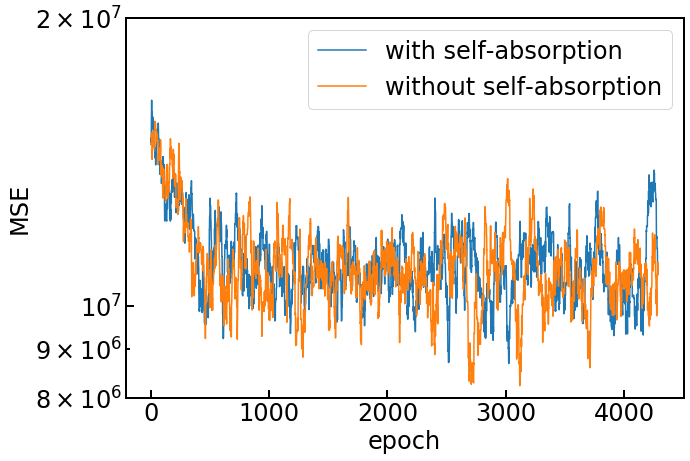

In [27]:
loss_signal_selfAb = np.load("./data/Xtal1_align1_adjusted1_ds2_recon/Ab_T_nEl_4_nDpts_5_b_1E-4_lr_1E-3/loss_signal.npy")
loss_moving_ave_selfAb = movingaverage(loss_signal_selfAb, 110)
loss_signal_woSelfAb = np.load("./data/Xtal1_align1_adjusted1_ds2_recon/Ab_F_nEl_4_nDpts_5_b_1E-4_lr_1E-3/loss_signal.npy")
loss_moving_ave_woselfAb = movingaverage(loss_signal_woSelfAb, 110)
epoch_ls = np.arange(0,4291)

fig0 = plt.figure(figsize = (10,7))
gs0 = gridspec.GridSpec(nrows=1, ncols=1)

fig0_ax0 = fig0.add_subplot(gs0[0,0])
# fig0_ax0.plot(epoch_ls, loss_moving_ave_selfAb, marker='s', fillstyle='none', label="with self-absorption")
# fig0_ax0.plot(epoch_ls, loss_moving_ave_woselfAb, marker='o', fillstyle='none', label="without self-absorption")
fig0_ax0.plot(epoch_ls, loss_moving_ave_selfAb, label="with self-absorption")
fig0_ax0.plot(epoch_ls, loss_moving_ave_woselfAb, label="without self-absorption")
fig0_ax0.set_yscale('log')
fig0_ax0.set_xlabel("epoch", fontsize=24)
fig0_ax0.set_ylabel("MSE", fontsize=24)
fig0_ax0.set_ylim([8.0E6, 2.0E7])
fig0_ax0.tick_params(axis='both', which='major', labelsize=24, width=2, length=8)
fig0_ax0.tick_params(axis='both', which='major', direction='in', width=2, length=8)
fig0_ax0.tick_params(axis='both', which='minor', labelsize=24, width=2, length=4)
fig0_ax0.tick_params(axis='both', which='minor', direction='in', width=2, length=4)
fig0_ax0.spines["top"].set_linewidth(2)
fig0_ax0.spines["bottom"].set_linewidth(2)
fig0_ax0.spines["left"].set_linewidth(2)
fig0_ax0.spines["right"].set_linewidth(2)
fig0_ax0.legend(fontsize=24)
plt.savefig('Self_absorption_effect_convergence.pdf', format='pdf', dpi=600)

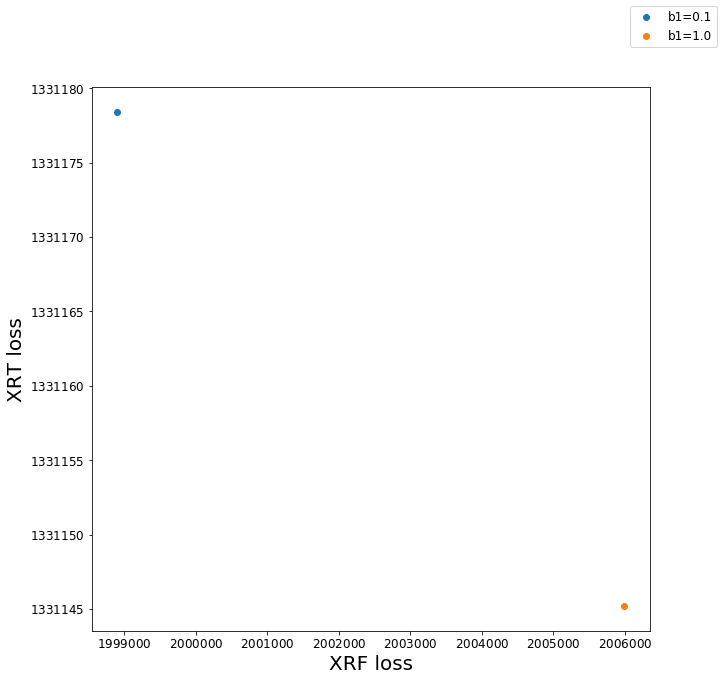

In [176]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
# XRF_loss = np.array([, 1998899.8 ,2005993.9])
# XRT_loss = np.array([, 1331178.4 ,1331145.2])

b1 = np.array([0, 0.1, 1.0])
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True, useOffset=False))
ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter(useMathText=True, useOffset=False))
ax.scatter(1998899.8, 1331178.4, label = "b1=0.1")
ax.scatter(2005993.9, 1331145.2, label = "b1=1.0")
ax.set_xlabel("XRF loss", fontsize=20)
ax.set_ylabel("XRT loss", fontsize=20)
fig.legend()